In [1]:
# 1. 전이학습
# 2. 파인튜닝
# 3. 3가지 이상의 모델로 학습
# 4. 체크포인트로 저장
# 5. 학습결과 시각화(텐서보드등 사용)

In [1]:
# 데이터 가져오기
import os,shutil

def dataset_split(data_folder,data_cnt):
    base_dir = './data/SKIN/'
    dir_list =[
        base_dir + 'train/',
        base_dir + 'test/'
    ]

    # 폴더 확인 및 생성
    for dir in dir_list:
        if not os.path.isdir(dir + data_folder):
            os.mkdir(dir + data_folder)

    cnt = 0

    # 이미지 데이터 가져오기
    for img_nm in os.listdir(base_dir + data_folder):
        cnt += 1

        if data_cnt >= cnt :
            shutil.move(base_dir + data_folder + '/' + img_nm ,base_dir + 'train/'+data_folder + '/' + img_nm) # 학습 데이터
        else :
            shutil.move(base_dir + data_folder + '/' + img_nm ,base_dir + 'test/'+data_folder + '/' + img_nm) # 테스트 데이터

    shutil.rmtree(base_dir + data_folder) # 기존 폴더 삭제

In [ ]:
# uv pip uninstall torch torchvision
# uv pip torch torchvision

In [35]:
# 80% 학습 20% 테스트
dataset_split('acne',int(len(os.listdir('./data/SKIN/acne')) * 0.8))
dataset_split('eksim',int(len(os.listdir('./data/SKIN/eksim')) * 0.8))
dataset_split('herpes',int(len(os.listdir('./data/SKIN/herpes')) * 0.8))
dataset_split('panu',int(len(os.listdir('./data/SKIN/panu')) * 0.8))
dataset_split('rosacea',int(len(os.listdir('./data/SKIN/rosacea')) * 0.8))

In [2]:
import os,shutil
import torch
import torch.nn as nn 
import torch.optim as optim
import torchvision
import numpy as np
import torch.functional as F 
from torchvision import datasets,models,transforms

In [4]:
# 데이터 전처리
transforms_train = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(p=0.5), 
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]) 
    ]
)

transforms_test = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize((224,224)),
        transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225]) 
    ]
)

In [5]:
train_datasets = datasets.ImageFolder('./data/SKIN/train',transform=transforms_train)
test_datasets = datasets.ImageFolder('./data/SKIN/test',transform=transforms_test)

In [31]:
train_datasets.classes

['acne', 'eksim', 'herpes', 'panu', 'rosacea']

In [6]:
import matplotlib.pyplot as plt

In [5]:
if hasattr(plt, 'title') and not callable(plt.title):
    del plt.title

In [7]:
def imgshow(img,title):
    mean = torch.tensor([0.485,0.456,0.406])
    std = torch.tensor([0.229,0.224,0.225])
    img = img.permute(1,2,0)
    img = img * std + mean
    plt.imshow(img)
    plt.title(title)
    plt.show()

In [33]:
train_loader = torch.utils.data.DataLoader(train_datasets,shuffle=True,batch_size=4)
test_loader = torch.utils.data.DataLoader(test_datasets,shuffle=False,batch_size=4)

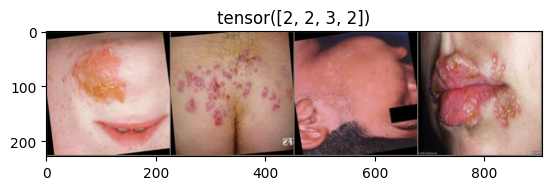

In [34]:
data_iter = iter(train_loader)
imgs,label = next(data_iter)
out_imgs = torchvision.utils.make_grid(imgs)
imgshow(out_imgs,label)

In [37]:
# 학습 1. renet32 모델로 학습
renet_model = models.resnet34(pretrained=True) # 학습된 내용 가져옴

In [50]:
for name,module in renet_model.named_parameters():
    print(name,module.requires_grad)

conv1.weight True
bn1.weight True
bn1.bias True
layer1.0.conv1.weight True
layer1.0.bn1.weight True
layer1.0.bn1.bias True
layer1.0.conv2.weight True
layer1.0.bn2.weight True
layer1.0.bn2.bias True
layer1.1.conv1.weight True
layer1.1.bn1.weight True
layer1.1.bn1.bias True
layer1.1.conv2.weight True
layer1.1.bn2.weight True
layer1.1.bn2.bias True
layer1.2.conv1.weight True
layer1.2.bn1.weight True
layer1.2.bn1.bias True
layer1.2.conv2.weight True
layer1.2.bn2.weight True
layer1.2.bn2.bias True
layer2.0.conv1.weight True
layer2.0.bn1.weight True
layer2.0.bn1.bias True
layer2.0.conv2.weight True
layer2.0.bn2.weight True
layer2.0.bn2.bias True
layer2.0.downsample.0.weight True
layer2.0.downsample.1.weight True
layer2.0.downsample.1.bias True
layer2.1.conv1.weight True
layer2.1.bn1.weight True
layer2.1.bn1.bias True
layer2.1.conv2.weight True
layer2.1.bn2.weight True
layer2.1.bn2.bias True
layer2.2.conv1.weight True
layer2.2.bn1.weight True
layer2.2.bn1.bias True
layer2.2.conv2.weight True


In [25]:
renet_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [38]:
# 모델 동결
for param in renet_model.parameters():
    param.requires_grad = False

In [39]:
num_ftrs = renet_model.fc.in_features
num_ftrs

512

In [40]:
renet_model.fc = nn.Linear(num_ftrs,5)
renet_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# 검증데이터

In [41]:
# 검증데이터
from torch.utils.data import random_split
train_data_size = len(train_datasets)

#8 : 2
train_size = int(train_data_size*0.8)
val_size = train_data_size - train_size # 검증데이터 사이즈

print(f'학습데이터 사이즈 : {train_size}, 검증데이터 사이즈 : {val_size}')

train_data_set, val_data_set = random_split(train_datasets,[train_size,val_size]) 

# 데이터 로더 다시 함
train_data_loader = torch.utils.data.DataLoader(train_data_set,batch_size=4,shuffle=True) # 학습 데이터 셋
val_data_loader = torch.utils.data.DataLoader(val_data_set,batch_size=4,shuffle=True) # 검증 데이터 셋

학습데이터 사이즈 : 955, 검증데이터 사이즈 : 239


# 학습

In [54]:
# 학습
import tqdm
from torch.utils.tensorboard import SummaryWriter

device = 'cuda' if torch.cuda.is_available else 'cpu'

writer = SummaryWriter() # 손실율을 그래프로 시각화 해주는 라이브러리
renet_model.to(device)

optimize = optim.Adam(renet_model.parameters(),lr=3e-3)
criterion = nn.CrossEntropyLoss()
epochs = 5
count = 0

best_val_loss = 100000
stop_count = 3 # 3번연속 손실률 높으면 멈추기 위한 변수
early_stop_count = 0 # 연속으로 손실률 높으면 카운트
val_loss = 0

for epoch in range(epochs):
    renet_model.train()
    correct_cnt = 0
    train_tqdm = tqdm.tqdm(train_data_loader) # 반복문 진행을 보여주는 라이브러리 train_loader
    for img,labels in train_tqdm:

        img = img.to(device)
        labels = labels.to(device)

        # 기울기 초기화
        optimize.zero_grad()

        # 학습하기
        preds = renet_model(img)
        pred = torch.max(preds,1)[1]

        # loss
        loss = criterion(preds,labels)

        writer.add_scalar('Loss/train',loss,count) # 손실률 기록 (그래프 Y : loss, X : count)
        count += 1

        # 역전파
        loss.backward()

        # 가중치
        optimize.step()
        
        train_tqdm.set_description(f'epoch : {epoch+1} loss : {loss.item():.2f}') # .2f 소숫점 두번째자리까지

        correct_cnt += (pred==labels).sum().item()

    print(f'정확률 : {correct_cnt/len(train_datasets.targets)}')
    print(f'{correct_cnt} / {len(train_datasets.targets)}')

    # 검증 ---validation 모의고사 시작------
    renet_model.eval()
    with torch.no_grad():
        for img,labels in val_data_loader:
            img = img.to(device)
            labels = labels.to(device)

            pred = renet_model(img) # 예측
            val_loss += criterion(pred,labels) # 손실

    total_val_loss = val_loss / len(val_data_loader) # 평균 loss값 
    # //검증 ---validation 모의고사 종료------ 

    #--------------- Early Stopping 할것인지 확인 --------------
    if best_val_loss > total_val_loss : 
        best_val_loss = total_val_loss # 손실값이 적을경우 저장
        torch.save(renet_model.state_dict(),'best_model.pth')
        early_stop_count = 0 # 손실률이 높은경우 초기셋
    else :
        early_stop_count += 1 # 연속으로 손실률이 높은경우 카운트
        print(f"-----{early_stop_count} : {best_val_loss}-----")
        if early_stop_count >= stop_count :
            break
    #--------------- //Early Stopping 할것인지 확인 --------------


    # 체크 포인트마다 저장
    torch.save({
        'epoch' : epoch,
        'model_state_dict':renet_model.state_dict(),
        'optimizer_state_dict' : optimize.state_dict(),
        'loss' : loss
    },'checkpoint.pth')

epoch : 1 loss : 1.04: 100%|██████████| 239/239 [00:09<00:00, 25.64it/s]


정확률 : 0.39782244556113905
475 / 1194


epoch : 2 loss : 0.17: 100%|██████████| 239/239 [00:08<00:00, 27.51it/s]


정확률 : 0.567001675041876
677 / 1194
-----1 : 0.9311372637748718-----


epoch : 3 loss : 0.77: 100%|██████████| 239/239 [00:08<00:00, 28.30it/s]


정확률 : 0.6197654941373534
740 / 1194
-----2 : 0.9311372637748718-----


epoch : 4 loss : 0.32: 100%|██████████| 239/239 [00:08<00:00, 27.75it/s]


정확률 : 0.6373534338358459
761 / 1194
-----3 : 0.9311372637748718-----


In [55]:
renet_model.eval() # 테스트 로 전환

with torch.no_grad():
    corr_cnt = 0

    for imgs,labels in test_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)

        preds = renet_model(imgs)

        pred = torch.max(preds,1)[1]

        corr_cnt += (pred == labels).sum().item()
        img_grid = torchvision.utils.make_grid(imgs)

        # imgshow(img = img_grid.cpu(),title= (pred,labels.cpu()))

    acc = (corr_cnt / len(test_datasets.targets) )* 100
    print(f'정확도 : {acc}%, corr : {corr_cnt}, total : {len(test_datasets.targets)}')


정확도 : 54.0%, corr : 27, total : 50


In [ ]:
# 첫번째 학습에서 62%
# 테스트에서 60%

In [53]:
# layer 4 재 학습위해 모델 다시 가져옴
renet_model = models.resnet34(pretrained=True)
renet_model.fc = nn.Linear(512,5)

for param in renet_model.parameters():
    param.requires_grad = False

for param in renet_model.layer4.parameters():
    param.requires_grad = True

# 학습시 정확도 85%
# 테스트 70%

c:\potenup3\prj_deep\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\potenup3\prj_deep\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [47]:
# layer 3 재 학습위해 모델 다시 가져옴
renet_model = models.resnet34(pretrained=True)
renet_model.fc = nn.Linear(512,5)

for param in renet_model.parameters():
    param.requires_grad = False

for param in renet_model.layer4.parameters():
    param.requires_grad = True

for param in renet_model.layer3.parameters():
    param.requires_grad = True


# 학습시 정확도 82%
# 테스트 73%

In [ ]:
# uv pip install grad-cam
# from pytorch_grad_cam import GradCAM
# from pytorch_grad_cam.utils.image import show_cam_on_image
# from pytorch_grad_cam

# 모델2 ( EFFICIENTNET )

In [ ]:
# 2. 모델 불러오기 (S: Small, M: Medium, L: Large 중 가장 가벼운 S 버전을 사용합니다)
# weights='DEFAULT'는 가장 최신 버전의 학습 데이터를 사용하겠다는 뜻입니다.

device = device = torch.device("cpu") #'cuda' if torch.cuda.is_available else 'cpu'
eff_model = models.efficientnet_v2_s(weights='DEFAULT')

# 3. 마지막 출력 부분 수정하기 (Fine-tuning)
# EfficientNet V2는 기본적으로 1,000개의 사물을 구분하도록 설정되어 있습니다.
# 만약 우리가 '강아지 vs 고양이' 2종류만 구분하고 싶다면 아래와 같이 수정합니다.
num_classes = 5 
in_features = eff_model.classifier[1].in_features # 원래 모델의 마지막 입력값 크기를 가져옵니다.

# 마지막 층(classifier)을 우리 목적에 맞게 교체합니다.
eff_model.classifier[1] = nn.Linear(in_features, num_classes)

# 모델을 설정한 장치(GPU/CPU)로 보냅니다.
eff_model = eff_model.to(device)

TypeError: EnumType.__call__() missing 1 required positional argument: 'value'

In [34]:
# 4. 이미지 전처리 설정
preprocess = transforms.Compose([
    transforms.Resize(384),          # 이미지 크기를 384x384로 조절 (V2 S 모델 권장 크기)
    transforms.CenterCrop(384),      # 가운데를 중심으로 자르기
    transforms.ToTensor(),           # 이미지를 숫자로 변환
    transforms.Normalize(            # 색상 값 표준화 (모델이 학습했던 데이터 기준)
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
    ),
])

test_preprocess = transforms.Compose([
    transforms.Resize((384,384)),          # 이미지 크기를 384x384로 조절 (V2 S 모델 권장 크기)
    #transforms.CenterCrop(384),      # 가운데를 중심으로 자르기
    transforms.ToTensor(),           # 이미지를 숫자로 변환
    transforms.Normalize(            # 색상 값 표준화 (모델이 학습했던 데이터 기준)
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
    ),
])



In [35]:
train_datasets = datasets.ImageFolder('./data/SKIN/train',transform=preprocess)
test_datasets = datasets.ImageFolder('./data/SKIN/test',transform=test_preprocess)

In [36]:
#train_data_loader = torch.utils.data.DataLoader(train_datasets,shuffle=True,batch_size=4)
test_data_loader = torch.utils.data.DataLoader(test_datasets,shuffle=True,batch_size=4)

# 검증데이터

In [26]:
# 검증데이터
from torch.utils.data import random_split
train_data_size = len(train_datasets)

#8 : 2
train_size = int(train_data_size*0.8)
val_size = train_data_size - train_size # 검증데이터 사이즈

print(f'학습데이터 사이즈 : {train_size}, 검증데이터 사이즈 : {val_size}')

train_data_set, val_data_set = random_split(train_datasets,[train_size,val_size]) 

# 데이터 로더 다시 함
train_data_loader = torch.utils.data.DataLoader(train_data_set,batch_size=4,shuffle=True) # 학습 데이터 셋
val_data_loader = torch.utils.data.DataLoader(val_data_set,batch_size=4,shuffle=True) # 검증 데이터 셋

학습데이터 사이즈 : 955, 검증데이터 사이즈 : 239


# 학습

In [32]:
# 학습
import tqdm
from torch.utils.tensorboard import SummaryWriter

#device = 'cuda' if torch.cuda.is_available else 'cpu'

writer = SummaryWriter() # 손실율을 그래프로 시각화 해주는 라이브러리
#eff_model.to(device)

optimize = optim.Adam(eff_model.parameters(),lr=3e-3)
criterion = nn.CrossEntropyLoss()
epochs = 5
count = 0

best_val_loss = 100000
stop_count = 3 # 3번연속 손실률 높으면 멈추기 위한 변수
early_stop_count = 0 # 연속으로 손실률 높으면 카운트
val_loss = 0

for epoch in range(epochs):
    eff_model.train()
    correct_cnt = 0
    train_tqdm = tqdm.tqdm(train_data_loader) # 반복문 진행을 보여주는 라이브러리 train_loader
    for img,labels in train_tqdm:

        img = img.to(device)
        labels = labels.to(device)

        # 기울기 초기화
        optimize.zero_grad()

        # 학습하기
        preds = eff_model(img)
        pred = torch.max(preds,1)[1]

        # loss
        loss = criterion(preds,labels)

        writer.add_scalar('Loss/train',loss,count) # 손실률 기록 (그래프 Y : loss, X : count)
        count += 1

        # 역전파
        loss.backward()

        # 가중치
        optimize.step()
        
        train_tqdm.set_description(f'epoch : {epoch+1} loss : {loss.item():.2f}') # .2f 소숫점 두번째자리까지

        correct_cnt += (pred==labels).sum().item()

    print(f'정확률 : {correct_cnt/len(train_datasets.targets)}')
    print(f'{correct_cnt} / {len(train_datasets.targets)}')

    # 검증 ---validation 모의고사 시작------
    eff_model.eval()
    with torch.no_grad():
        for img,labels in val_data_loader:
            img = img.to(device)
            labels = labels.to(device)

            pred = eff_model(img) # 예측
            val_loss += criterion(pred,labels) # 손실

    total_val_loss = val_loss / len(val_data_loader) # 평균 loss값 
    # //검증 ---validation 모의고사 종료------ 

    #--------------- Early Stopping 할것인지 확인 --------------
    if best_val_loss > total_val_loss : 
        best_val_loss = total_val_loss # 손실값이 적을경우 저장
        torch.save(eff_model.state_dict(),'best_eff_model.pth')
        early_stop_count = 0 # 손실률이 높은경우 초기셋
    else :
        early_stop_count += 1 # 연속으로 손실률이 높은경우 카운트
        print(f"-----{early_stop_count} : {best_val_loss}-----")
        if early_stop_count >= stop_count :
            break
    #--------------- //Early Stopping 할것인지 확인 --------------


    # 체크 포인트마다 저장
    torch.save({
        'epoch' : epoch,
        'model_state_dict':eff_model.state_dict(),
        'optimizer_state_dict' : optimize.state_dict(),
        'loss' : loss
    },'checkpoint.pth')

epoch : 1 loss : 1.19:   2%|▏         | 4/239 [00:09<09:22,  2.39s/it]


KeyboardInterrupt: 

In [37]:
eff_model.eval() # 테스트 로 전환

with torch.no_grad():
    corr_cnt = 0

    for imgs,labels in test_data_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)

        preds = eff_model(imgs)

        pred = torch.max(preds,1)[1]

        corr_cnt += (pred == labels).sum().item()
        img_grid = torchvision.utils.make_grid(imgs)

        # imgshow(img = img_grid.cpu(),title= (pred,labels.cpu()))

    acc = (corr_cnt / len(test_datasets.targets) )* 100
    print(f'정확도 : {acc}%, corr : {corr_cnt}, total : {len(test_datasets.targets)}')


정확도 : 32.0%, corr : 16, total : 50


In [ ]:
# def predict_image(image_path):
#     # 이미지를 열고 전처리를 적용합니다.
#     img = Image.open(image_path)
#     img_t = preprocess(img)
#     batch_t = torch.unsqueeze(img_t, 0).to(device) # [1, 3, 384, 384] 형태로 차원 확장

#     # 모델을 '평가 모드'로 전환합니다.
#     eff_model.eval()

#     # 기울기 계산을 하지 않음으로써 메모리를 절약합니다.
#     with torch.no_grad():
#         output = eff_model(batch_t)
    
#     # 가장 높은 점수를 받은 인덱스를 찾아 반환합니다.
#     _, predicted = torch.max(output, 1)
#     return predicted.item()

In [ ]:
# 사용 예시 (이미지 파일이 있다면 주석을 해제하고 경로를 입력하세요)
# print(f"예측 결과: {predict_image('test_image.jpg')}")